In [ ]:
# Principal Component Analysis
# Author :Ipsita Patnaik

In [311]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy import cov
from numpy.linalg import eig
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [312]:
train = pd.read_csv("C:\\Users\\Ipsita\\Downloads\\train.csv")

In [313]:
X = train

In [314]:
X.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [315]:
# Scaling
scaler = StandardScaler()
X_sc=scaler.fit_transform(X)

In [316]:
X_sc

array([[-1.50850059, -1.04618804, -0.33089762,  1.22224926,  1.55318868],
       [ 0.48643979,  0.33117312, -0.23946186,  0.1626266 , -0.46827215],
       [ 1.28180818,  0.20758372, -0.93339394, -2.00152366, -0.87512534],
       ...,
       [ 1.3926382 ,  1.22894521, -0.42233337, -1.42178072, -1.43563982],
       [-0.76528751, -0.42279997,  0.77612816,  0.23300002,  0.59920817],
       [-0.5788323 , -0.7251665 ,  1.42434236,  0.66797479,  0.68767982]])

In [318]:
# Covariance Matrix
C = cov(X_sc.T)

In [319]:
C

array([[ 1.0033557 ,  0.8348396 , -0.48813383, -0.55855638, -0.96077486],
       [ 0.8348396 ,  1.0033557 , -0.36566879, -0.28307369, -0.87334932],
       [-0.48813383, -0.36566879,  1.0033557 ,  0.13255517,  0.47803789],
       [-0.55855638, -0.28307369,  0.13255517,  1.0033557 ,  0.43555826],
       [-0.96077486, -0.87334932,  0.47803789,  0.43555826,  1.0033557 ]])

In [321]:
# Eigen Values and Eigen Vectors
eig_values, eig_vectors=np.linalg.eigh(C)

In [322]:
# sort eigen values and eigen vectors in descending order
idx=eig_values.argsort()[::-1]
eig_values=eig_values[idx]
eig_vectors=eig_vectors[idx]  

In [323]:
eig_values

array([3.31114307, 0.88238123, 0.66256274, 0.12948707, 0.03120441])

In [324]:
eig_vectors

array([[-0.67911733, -0.46286511, -0.20337715, -0.03994917,  0.53065745],
       [-0.11739118,  0.24330317,  0.49026532,  0.76936315,  0.30780373],
       [-0.02557016,  0.14889166,  0.69838504, -0.62320276,  0.31789008],
       [-0.03268039, -0.72515022,  0.47569509,  0.11459969, -0.48339449],
       [-0.72339278,  0.42254926,  0.06519335, -0.07049565, -0.53752692]])

In [326]:
# Project Data
Project = eig_vectors.T.dot(X_sc.T)

In [327]:
Project

array([[-0.00778581, -0.02967343, -0.17252968, ...,  0.0057629 ,
         0.10842988, -0.07748976],
       [ 0.16440795, -0.49603118,  0.39984867, ...,  0.01589676,
         0.45115029,  0.10975521],
       [ 0.24546644, -0.05697217, -1.81995509, ..., -0.74560115,
         0.64029547,  1.11952114],
       [-0.50784252,  0.43624093,  0.52251231, ...,  1.09134047,
        -0.79393916, -1.39437534],
       [-2.65341603,  0.45704276,  1.88530838, ...,  2.4420082 ,
        -0.72424295, -0.77012808]])

In [329]:
error=[]
for i in range(len(eig_vectors)):
        G = eig_vectors[0:i+1,:]
        check = LA.norm(((G.T.dot(G)).dot(X_sc.T))-X_sc.T)
        error.append(check)

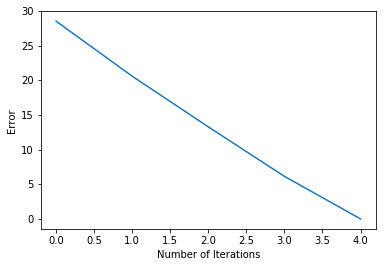

In [330]:
N=len(eig_vectors)
iteration=[]
for i in range(N):
    iteration.append(i)
plt.plot(iteration,error)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.show()